In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [5]:
df = pd.read_csv('finalz.csv')

In [6]:
df

,Unnamed: 0,name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings,url
0,0,رواح للوحدات السكنية,Taif,SAR 190.00,"1 night, 1 adult",One-Bedroom Apartment,"2 beds\r\n(1 extra-large double, 1 sofa bed)",7.5,Good,180 reviews,https://www.booking.com/hotel/sa/twrnt-ll-jnh-...
1,1,Aloft Riyadh Hotel,Riyadh,SAR 475.00,"1 night, 1 adult","Breezy Room, Guest room, 1 King",1 extra-large double bed,8.2,Very good,"2,947 reviews",https://www.booking.com/hotel/sa/aloft-riyadh....
2,2,Nourth House ApartHotel,Al Qurayyat,SAR 200.00,"1 night, 1 adult",Budget Twin Room,2 single beds,7.5,Good,264 reviews,https://www.booking.com/hotel/sa/nwrth-hws-lqr...
3,3,Dyar Al Hamra Hotel,Jeddah,SAR 340.00,"1 night, 1 adult",Junior Suite King,1 extra-large double bed,7.7,Good,"3,923 reviews",https://www.booking.com/hotel/sa/dyar-inn.en-g...
4,4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,SAR 525.00,"1 night, 1 adult","Standard, Guest room, 1 King",1 extra-large double bed,8.1,Very good,"1,032 reviews",https://www.booking.com/hotel/sa/courtyard-riy...
...,...,...,...,...,...,...,...,...,...,...,...
1070,49,العييري للوحدات المفروشة الباحة3,Buraydah,SAR 110.00,"1 night, 2 adults",Double Room with Private Bathroom,2 single beds,3.7,Review score,72 reviews,/hotel/sa/l-yyry-llwhdt-lskny-lmfrwsh-lbh-3-lb...
1071,50,Anwar Al Zahraa Hotel,Madinah,SAR 100.00,"1 night, 2 adults",Double Room,2 single beds,7.3,Good,260 reviews,/hotel/sa/anwar-al-zahraa.en-gb.html?aid=30414...
1072,51,OYO 242 Al Ahlam Resort Al Leith,Al Lith,SAR 387.00,"1 night, 2 adults",Standard Studio Double,1 double bed,6.5,Review score,333 reviews,/hotel/sa/al-ahlam-resort-alleith.en-gb.html?a...
1073,52,فندق سوار,Madinah,SAR 145.00,"1 night, 2 adults",Small Twin Room,2 single beds,8.6,Fabulous,22 reviews,/hotel/sa/sewar.en-gb.html?aid=304142&label=ge...


In [7]:
#Lets start by cleaning up the data following the below steps:
#     1. Checking and removing Duplicate rows
#     2. Stripping the columns/observations from white spaces
#     3. Removing texts from continious observations
#     4. Dropping unnecessarily columns 
    

In [8]:
df.drop({'Unnamed: 0','url'}, axis = 'columns' , inplace = True)

In [9]:
df

,name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings
0,رواح للوحدات السكنية,Taif,SAR 190.00,"1 night, 1 adult",One-Bedroom Apartment,"2 beds\r\n(1 extra-large double, 1 sofa bed)",7.5,Good,180 reviews
1,Aloft Riyadh Hotel,Riyadh,SAR 475.00,"1 night, 1 adult","Breezy Room, Guest room, 1 King",1 extra-large double bed,8.2,Very good,"2,947 reviews"
2,Nourth House ApartHotel,Al Qurayyat,SAR 200.00,"1 night, 1 adult",Budget Twin Room,2 single beds,7.5,Good,264 reviews
3,Dyar Al Hamra Hotel,Jeddah,SAR 340.00,"1 night, 1 adult",Junior Suite King,1 extra-large double bed,7.7,Good,"3,923 reviews"
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,SAR 525.00,"1 night, 1 adult","Standard, Guest room, 1 King",1 extra-large double bed,8.1,Very good,"1,032 reviews"
...,...,...,...,...,...,...,...,...,...
1070,العييري للوحدات المفروشة الباحة3,Buraydah,SAR 110.00,"1 night, 2 adults",Double Room with Private Bathroom,2 single beds,3.7,Review score,72 reviews
1071,Anwar Al Zahraa Hotel,Madinah,SAR 100.00,"1 night, 2 adults",Double Room,2 single beds,7.3,Good,260 reviews
1072,OYO 242 Al Ahlam Resort Al Leith,Al Lith,SAR 387.00,"1 night, 2 adults",Standard Studio Double,1 double bed,6.5,Review score,333 reviews
1073,فندق سوار,Madinah,SAR 145.00,"1 night, 2 adults",Small Twin Room,2 single beds,8.6,Fabulous,22 reviews


In [237]:
#df.dropna(how='all')

df.isnull().sum()


name                  0
location              0
price                 0
price_for             0
room_type             0
beds                  4
rating               38
rating_title         38
number_of_ratings    38
dtype: int64

In [238]:
df.rename(columns = {'name' : 'hotel_name'}, inplace = True)

In [239]:
df

,hotel_name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings
0,رواح للوحدات السكنية,Taif,SAR 190.00,"1 night, 1 adult",One-Bedroom Apartment,"2 beds\r\n(1 extra-large double, 1 sofa bed)",7.5,Good,180 reviews
1,Aloft Riyadh Hotel,Riyadh,SAR 475.00,"1 night, 1 adult","Breezy Room, Guest room, 1 King",1 extra-large double bed,8.2,Very good,"2,947 reviews"
2,Nourth House ApartHotel,Al Qurayyat,SAR 200.00,"1 night, 1 adult",Budget Twin Room,2 single beds,7.5,Good,264 reviews
3,Dyar Al Hamra Hotel,Jeddah,SAR 340.00,"1 night, 1 adult",Junior Suite King,1 extra-large double bed,7.7,Good,"3,923 reviews"
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,SAR 525.00,"1 night, 1 adult","Standard, Guest room, 1 King",1 extra-large double bed,8.1,Very good,"1,032 reviews"
...,...,...,...,...,...,...,...,...,...
1070,العييري للوحدات المفروشة الباحة3,Buraydah,SAR 110.00,"1 night, 2 adults",Double Room with Private Bathroom,2 single beds,3.7,Review score,72 reviews
1071,Anwar Al Zahraa Hotel,Madinah,SAR 100.00,"1 night, 2 adults",Double Room,2 single beds,7.3,Good,260 reviews
1072,OYO 242 Al Ahlam Resort Al Leith,Al Lith,SAR 387.00,"1 night, 2 adults",Standard Studio Double,1 double bed,6.5,Review score,333 reviews
1073,فندق سوار,Madinah,SAR 145.00,"1 night, 2 adults",Small Twin Room,2 single beds,8.6,Fabulous,22 reviews


In [240]:
df.columns.str.strip()

Index(['hotel_name', 'location', 'price', 'price_for', 'room_type', 'beds',
       'rating', 'rating_title', 'number_of_ratings'],
      dtype='object')

In [241]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1070    False
1071     True
1072     True
1073     True
1074     True
Length: 1075, dtype: bool

In [242]:
df.loc[df.duplicated(), :]

,hotel_name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings
153,Danat Park Hotel,Yanbu,SAR 140.00,"1 night, 2 adults",Budget Double Room,1 large double bed,6.5,Review score,563 reviews
154,فندق بانوراما الخبر-Panorama ALkohbar Hotel,Riyadh,SAR 400.00,"1 night, 2 adults",Duplex Studio,1 double bed,6.6,Review score,89 reviews
155,Rose Diamond Hotel,Madinah,SAR 100.00,"1 night, 2 adults",Standard Quadruple Room,3 single beds,6.7,Review score,318 reviews
156,Makarim Palm Hotel,Rabigh,SAR 160.00,"1 night, 2 adults",One-Bedroom Apartment,1 extra-large double bed,6.8,Review score,311 reviews
157,مينا بلازا الطائف Mena Plaza Taif,Taif,SAR 140.00,"1 night, 2 adults",Standard King Room,1 extra-large double bed,5.8,Review score,"1,112 reviews"
...,...,...,...,...,...,...,...,...,...
1069,Faifa Hotel,Fayfa,SAR 375.00,"1 night, 2 adults",Double Room,1 large double bed,7.0,Good,302 reviews
1071,Anwar Al Zahraa Hotel,Madinah,SAR 100.00,"1 night, 2 adults",Double Room,2 single beds,7.3,Good,260 reviews
1072,OYO 242 Al Ahlam Resort Al Leith,Al Lith,SAR 387.00,"1 night, 2 adults",Standard Studio Double,1 double bed,6.5,Review score,333 reviews
1073,فندق سوار,Madinah,SAR 145.00,"1 night, 2 adults",Small Twin Room,2 single beds,8.6,Fabulous,22 reviews


In [243]:
df.drop_duplicates(keep='first' ,inplace=True)

In [244]:
df

,hotel_name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings
0,رواح للوحدات السكنية,Taif,SAR 190.00,"1 night, 1 adult",One-Bedroom Apartment,"2 beds\r\n(1 extra-large double, 1 sofa bed)",7.5,Good,180 reviews
1,Aloft Riyadh Hotel,Riyadh,SAR 475.00,"1 night, 1 adult","Breezy Room, Guest room, 1 King",1 extra-large double bed,8.2,Very good,"2,947 reviews"
2,Nourth House ApartHotel,Al Qurayyat,SAR 200.00,"1 night, 1 adult",Budget Twin Room,2 single beds,7.5,Good,264 reviews
3,Dyar Al Hamra Hotel,Jeddah,SAR 340.00,"1 night, 1 adult",Junior Suite King,1 extra-large double bed,7.7,Good,"3,923 reviews"
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,SAR 525.00,"1 night, 1 adult","Standard, Guest room, 1 King",1 extra-large double bed,8.1,Very good,"1,032 reviews"
...,...,...,...,...,...,...,...,...,...
1044,Golden Sea Hotel,Obhor,SAR 340.00,"1 night, 2 adults",Junior Suite,1 large double bed,8.2,Very good,172 reviews
1045,Desert Rose Motel,Al Ghat,SAR 150.00,"1 night, 2 adults",Family Room with Private Bathroom,1 large double bed,NaN,NaN,NaN
1046,Golden Dune Hotel,Turayf,SAR 250.00,"1 night, 2 adults",Small Double Room,1 double bed,9.0,Superb,"1,735 reviews"
1047,قصر البالود 2,Riyadh,SAR 127.00,"1 night, 2 adults",Budget Double Room,1 double bed,8.9,Fabulous,228 reviews


In [245]:
df.duplicated().sum()

0

In [246]:
df.sort_values('price', ascending = False)

,hotel_name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings
496,Swiss International Resort Unaizah Al Qassim,Unayzah,SAR 998.00,"1 night, 2 adults",One Bedroom Villa with Indoor Pool,1 large double bed,8.5,Very good,871 reviews
163,Al Eairy Apartment-Alqaseem 1,Buraydah,SAR 99.00,"1 night, 2 adults",Twin Room,2 single beds,4.8,Review score,352 reviews
963,Al Kiswah Towers Hotel,Makkah Show on map,SAR 99.00,"1 night, 1 adult",Standard Double or Twin Room,2 single beds,8.2,Very good,"5,241 reviews"
679,أجنحة سالين - للوحدات السكنية المفروشة,As Suwayfilah,SAR 99.00,"1 night, 1 adult",Double Room with Private Bathroom,1 large double bed,5.9,Review score,53 reviews
86,Rihan Tibah Furnished Units,Madinah,SAR 99.00,"1 night, 2 adults",Triple Room with Private Bathroom,3 single beds,5.4,Review score,36 reviews
...,...,...,...,...,...,...,...,...,...
853,Fraser Suites Riyadh,Riyadh,"SAR 1,035.00","1 night, 1 adult",Executive One Bedroom Suite,1 extra-large double bed,7.9,Good,"4,110 reviews"
206,شالية مارينا,Al Muwayh,"SAR 1,000.00","1 night, 2 adults",Two-Bedroom Chalet,"3 beds\r\n(1 single, 1 double, 1 sofa bed)",NaN,NaN,NaN
213,شاليهات فلورنيسا الطائف,Taif,"SAR 1,000.00","1 night, 2 adults",Deluxe King Room,1 single bed,8.5,Very good,6 reviews
715,"Burj Rafal Riyadh, a Marriott International Hotel",Riyadh,"SAR 1,000.00","1 night, 1 adult","Deluxe, Guest room, 1 King, City view",1 extra-large double bed,7.9,Good,"4,620 reviews"


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 1070
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_name         899 non-null    object 
 1   location           899 non-null    object 
 2   price              899 non-null    object 
 3   price_for          899 non-null    object 
 4   room_type          899 non-null    object 
 5   beds               895 non-null    object 
 6   rating             867 non-null    float64
 7   rating_title       867 non-null    object 
 8   number_of_ratings  867 non-null    object 
dtypes: float64(1), object(8)
memory usage: 70.2+ KB


In [248]:
#df["price"] == "SAR 1,000"

df

,hotel_name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings
0,رواح للوحدات السكنية,Taif,SAR 190.00,"1 night, 1 adult",One-Bedroom Apartment,"2 beds\r\n(1 extra-large double, 1 sofa bed)",7.5,Good,180 reviews
1,Aloft Riyadh Hotel,Riyadh,SAR 475.00,"1 night, 1 adult","Breezy Room, Guest room, 1 King",1 extra-large double bed,8.2,Very good,"2,947 reviews"
2,Nourth House ApartHotel,Al Qurayyat,SAR 200.00,"1 night, 1 adult",Budget Twin Room,2 single beds,7.5,Good,264 reviews
3,Dyar Al Hamra Hotel,Jeddah,SAR 340.00,"1 night, 1 adult",Junior Suite King,1 extra-large double bed,7.7,Good,"3,923 reviews"
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,SAR 525.00,"1 night, 1 adult","Standard, Guest room, 1 King",1 extra-large double bed,8.1,Very good,"1,032 reviews"
...,...,...,...,...,...,...,...,...,...
1044,Golden Sea Hotel,Obhor,SAR 340.00,"1 night, 2 adults",Junior Suite,1 large double bed,8.2,Very good,172 reviews
1045,Desert Rose Motel,Al Ghat,SAR 150.00,"1 night, 2 adults",Family Room with Private Bathroom,1 large double bed,NaN,NaN,NaN
1046,Golden Dune Hotel,Turayf,SAR 250.00,"1 night, 2 adults",Small Double Room,1 double bed,9.0,Superb,"1,735 reviews"
1047,قصر البالود 2,Riyadh,SAR 127.00,"1 night, 2 adults",Budget Double Room,1 double bed,8.9,Fabulous,228 reviews


In [186]:
df

,hotel_name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings
0,رواح للوحدات السكنية,Taif,SAR 190.00,"1 night, 1 adult",One-Bedroom Apartment,"2 beds\r\n(1 extra-large double, 1 sofa bed)",7.5,Good,180 reviews
1,Aloft Riyadh Hotel,Riyadh,SAR 475.00,"1 night, 1 adult","Breezy Room, Guest room, 1 King",1 extra-large double bed,8.2,Very good,"2,947 reviews"
2,Nourth House ApartHotel,Al Qurayyat,SAR 200.00,"1 night, 1 adult",Budget Twin Room,2 single beds,7.5,Good,264 reviews
3,Dyar Al Hamra Hotel,Jeddah,SAR 340.00,"1 night, 1 adult",Junior Suite King,1 extra-large double bed,7.7,Good,"3,923 reviews"
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,SAR 525.00,"1 night, 1 adult","Standard, Guest room, 1 King",1 extra-large double bed,8.1,Very good,"1,032 reviews"
...,...,...,...,...,...,...,...,...,...
1070,العييري للوحدات المفروشة الباحة3,Buraydah,SAR 110.00,"1 night, 2 adults",Double Room with Private Bathroom,2 single beds,3.7,Review score,72 reviews
1071,Anwar Al Zahraa Hotel,Madinah,SAR 100.00,"1 night, 2 adults",Double Room,2 single beds,7.3,Good,260 reviews
1072,OYO 242 Al Ahlam Resort Al Leith,Al Lith,SAR 387.00,"1 night, 2 adults",Standard Studio Double,1 double bed,6.5,Review score,333 reviews
1073,فندق سوار,Madinah,SAR 145.00,"1 night, 2 adults",Small Twin Room,2 single beds,8.6,Fabulous,22 reviews


In [249]:
df2= (df['price'].str.extract(r'(?P<price>\d+(?:\,\d+)?)').applymap(str.strip))

In [250]:
df2.sort_values('price', ascending = False)

,price
496,998
163,99
963,99
679,99
86,99
...,...
853,"1,035"
206,"1,000"
213,"1,000"
715,"1,000"


In [225]:
df

,hotel_name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings
0,رواح للوحدات السكنية,Taif,190,"1 night, 1 adult",One-Bedroom Apartment,"2 beds\r\n(1 extra-large double, 1 sofa bed)",7.5,Good,180 reviews
1,Aloft Riyadh Hotel,Riyadh,475,"1 night, 1 adult","Breezy Room, Guest room, 1 King",1 extra-large double bed,8.2,Very good,"2,947 reviews"
2,Nourth House ApartHotel,Al Qurayyat,200,"1 night, 1 adult",Budget Twin Room,2 single beds,7.5,Good,264 reviews
3,Dyar Al Hamra Hotel,Jeddah,340,"1 night, 1 adult",Junior Suite King,1 extra-large double bed,7.7,Good,"3,923 reviews"
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,525,"1 night, 1 adult","Standard, Guest room, 1 King",1 extra-large double bed,8.1,Very good,"1,032 reviews"
...,...,...,...,...,...,...,...,...,...
1070,العييري للوحدات المفروشة الباحة3,Buraydah,110,"1 night, 2 adults",Double Room with Private Bathroom,2 single beds,3.7,Review score,72 reviews
1071,Anwar Al Zahraa Hotel,Madinah,100,"1 night, 2 adults",Double Room,2 single beds,7.3,Good,260 reviews
1072,OYO 242 Al Ahlam Resort Al Leith,Al Lith,387,"1 night, 2 adults",Standard Studio Double,1 double bed,6.5,Review score,333 reviews
1073,فندق سوار,Madinah,145,"1 night, 2 adults",Small Twin Room,2 single beds,8.6,Fabulous,22 reviews


In [251]:
df['price'] = df2['price']

In [252]:
df['price'] = df['price'].str.replace(',', '')

In [253]:
df.sort_values('price', ascending = False) 

,hotel_name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings
496,Swiss International Resort Unaizah Al Qassim,Unayzah,998,"1 night, 2 adults",One Bedroom Villa with Indoor Pool,1 large double bed,8.5,Very good,871 reviews
163,Al Eairy Apartment-Alqaseem 1,Buraydah,99,"1 night, 2 adults",Twin Room,2 single beds,4.8,Review score,352 reviews
963,Al Kiswah Towers Hotel,Makkah Show on map,99,"1 night, 1 adult",Standard Double or Twin Room,2 single beds,8.2,Very good,"5,241 reviews"
679,أجنحة سالين - للوحدات السكنية المفروشة,As Suwayfilah,99,"1 night, 1 adult",Double Room with Private Bathroom,1 large double bed,5.9,Review score,53 reviews
86,Rihan Tibah Furnished Units,Madinah,99,"1 night, 2 adults",Triple Room with Private Bathroom,3 single beds,5.4,Review score,36 reviews
...,...,...,...,...,...,...,...,...,...
52,Golden Dakhil,Madinah,100,"1 night, 2 adults",Economy Double Room,1 extra-large double bed,7.3,Good,420 reviews
504,Manarat Al Misk Hotel,Makkah,100,"1 night, 2 adults",Basic Triple Room,3 single beds,6.9,Review score,517 reviews
131,Genac Hotel Yanbu,Yanbu,100,"1 night, 2 adults",Deluxe Double Room,2 single beds,7.1,Good,444 reviews
535,Manarat Al Misk Hotel,Makkah,100,"1 night, 2 adults",Basic Triple Room,3 single beds,6.9,Review score,517 reviews


In [254]:
df['price'] == 1000

0       False
1       False
2       False
3       False
4       False
        ...  
1044    False
1045    False
1046    False
1047    False
1070    False
Name: price, Length: 899, dtype: bool

In [255]:
df['price'] = df['price'].astype(int)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 1070
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_name         899 non-null    object 
 1   location           899 non-null    object 
 2   price              899 non-null    int64  
 3   price_for          899 non-null    object 
 4   room_type          899 non-null    object 
 5   beds               895 non-null    object 
 6   rating             867 non-null    float64
 7   rating_title       867 non-null    object 
 8   number_of_ratings  867 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 70.2+ KB


In [259]:
df.loc[df['price'] >= 1000].count()

hotel_name           38
location             38
price                38
price_for            38
room_type            38
beds                 38
rating               35
rating_title         35
number_of_ratings    35
dtype: int64

In [583]:
df[df.price >= 1000]

,hotel_name,location,price,room_type,beds,rating,rating_title,number_of_ratings,per_night
88,مزرعة بإطلالة على الجبل,Madain,1603,Family Room,8,8.5,Very good,15,1
103,منتجع قرية الفقرة,Madinah,1400,Two-Bedroom Villa,4,8.6,Fabulous,8,1
110,Luxury apartment in KAEC شقة فاخرة ابراج الشاط...,King Abdullah Economic City,1259,Apartment,5,9.4,Superb,7,1
133,شاليهات سحاب,Buraydah,1150,Two-Bedroom Chalet,3,9.1,Superb,14,1
158,Luxury apartment in KAEC شقة فاخرة ابراج الشاط...,King Abdullah Economic,1259,Apartment,5,9.4,Superb,7,1
199,شالية مارينا,Al Muwayh,1000,Two-Bedroom Chalet,3,0.0,NaN,0,1
206,شاليهات فلورنيسا الطائف,Taif,1000,Deluxe King Room,1,8.5,Very good,6,1
260,منتجع ومزرعة الرند العلا,Al Ula,1250,Two-Bedroom Chalet without pool,5,7.2,Good,8,1
450,شاليه فيلا درة العروس,Jeddah,2000,Two-Bedroom Chalet,9,8.5,Very good,77,1
594,"Burj Rafal Riyadh, a Marriott International Hotel",Riyadh,1000,"Deluxe, Guest room, 1 King, City view",1,7.9,Good,4620,1


In [264]:
df['number_of_ratings'] = (df['number_of_ratings'].str.extract(r'(?P<number_of_ratings>\d+(?:\,\d+)?)').astype(str)
                 .applymap(str.strip))

In [265]:
df['number_of_ratings']

0         180
1       2,947
2         264
3       3,923
4       1,032
        ...  
1044      172
1045      nan
1046    1,735
1047      228
1070       72
Name: number_of_ratings, Length: 899, dtype: object

In [266]:
df['number_of_ratings'] = df['number_of_ratings'].str.replace(',', '')

In [295]:
df['number_of_ratings']


0        180
1       2947
2        264
3       3923
4       1032
        ... 
1044     172
1045       0
1046    1735
1047     228
1070      72
Name: number_of_ratings, Length: 899, dtype: object

In [279]:
df['number_of_ratings'] = df['number_of_ratings'].fillna(0)
#



In [280]:
df['number_of_ratings']

0        180
1       2947
2        264
3       3923
4       1032
        ... 
1044     172
1045     nan
1046    1735
1047     228
1070      72
Name: number_of_ratings, Length: 899, dtype: object

0        180
1       2947
2        264
3       3923
4       1032
        ... 
1044     172
1045     nan
1046    1735
1047     228
1070      72
Name: number_of_ratings, Length: 899, dtype: object

In [282]:
df['number_of_ratings']

0        180
1       2947
2        264
3       3923
4       1032
        ... 
1044     172
1045     nan
1046    1735
1047     228
1070      72
Name: number_of_ratings, Length: 899, dtype: object

In [283]:
df['number_of_ratings'] = df['number_of_ratings'].replace(np.nan, 0)

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 1070
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_name         899 non-null    object 
 1   location           899 non-null    object 
 2   price              899 non-null    int64  
 3   price_for          899 non-null    object 
 4   room_type          899 non-null    object 
 5   beds               895 non-null    object 
 6   rating             867 non-null    float64
 7   rating_title       867 non-null    object 
 8   number_of_ratings  899 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 110.2+ KB


In [293]:


df['number_of_ratings'] = df['number_of_ratings'].replace('nan', 0)

In [294]:
df['number_of_ratings']

0        180
1       2947
2        264
3       3923
4       1032
        ... 
1044     172
1045       0
1046    1735
1047     228
1070      72
Name: number_of_ratings, Length: 899, dtype: object

In [303]:
df.info()
df['number_of_ratings'].fillna(0)
df['number_of_ratings'].astype(int)
#df['number_of_ratings'] = pd.to_numeric(df['number_of_ratings']) convert






<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 1070
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_name         899 non-null    object 
 1   location           899 non-null    object 
 2   price              899 non-null    int64  
 3   price_for          899 non-null    object 
 4   room_type          899 non-null    object 
 5   beds               895 non-null    object 
 6   rating             867 non-null    float64
 7   rating_title       867 non-null    object 
 8   number_of_ratings  899 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 110.2+ KB


0        180
1       2947
2        264
3       3923
4       1032
        ... 
1044     172
1045       0
1046    1735
1047     228
1070      72
Name: number_of_ratings, Length: 899, dtype: int64

In [322]:
df['rating'] = df['rating'].replace(np.nan, 0)

In [323]:
df['rating']

0       7.5
1       8.2
2       7.5
3       7.7
4       8.1
       ... 
1044    8.2
1045    0.0
1046    9.0
1047    8.9
1070    3.7
Name: rating, Length: 899, dtype: float64

In [326]:
df['per_night']= df['price_for']

In [327]:
df

,hotel_name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings,per_night
0,رواح للوحدات السكنية,Taif,190,"1 night, 1 adult",One-Bedroom Apartment,"2 beds\r\n(1 extra-large double, 1 sofa bed)",7.5,Good,180,"1 night, 1 adult"
1,Aloft Riyadh Hotel,Riyadh,475,"1 night, 1 adult","Breezy Room, Guest room, 1 King",1 extra-large double bed,8.2,Very good,2947,"1 night, 1 adult"
2,Nourth House ApartHotel,Al Qurayyat,200,"1 night, 1 adult",Budget Twin Room,2 single beds,7.5,Good,264,"1 night, 1 adult"
3,Dyar Al Hamra Hotel,Jeddah,340,"1 night, 1 adult",Junior Suite King,1 extra-large double bed,7.7,Good,3923,"1 night, 1 adult"
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,525,"1 night, 1 adult","Standard, Guest room, 1 King",1 extra-large double bed,8.1,Very good,1032,"1 night, 1 adult"
...,...,...,...,...,...,...,...,...,...,...
1044,Golden Sea Hotel,Obhor,340,"1 night, 2 adults",Junior Suite,1 large double bed,8.2,Very good,172,"1 night, 2 adults"
1045,Desert Rose Motel,Al Ghat,150,"1 night, 2 adults",Family Room with Private Bathroom,1 large double bed,0.0,NaN,0,"1 night, 2 adults"
1046,Golden Dune Hotel,Turayf,250,"1 night, 2 adults",Small Double Room,1 double bed,9.0,Superb,1735,"1 night, 2 adults"
1047,قصر البالود 2,Riyadh,127,"1 night, 2 adults",Budget Double Room,1 double bed,8.9,Fabulous,228,"1 night, 2 adults"


In [330]:
df['per_night'] = (df['per_night'].str.extract(r'(?P<per_night>\d+(?:\,\d+)?)').astype(str)
                 .applymap(str.strip))

In [335]:
df

,hotel_name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings,per_night
0,رواح للوحدات السكنية,Taif,190,"1 night, 1 adult",One-Bedroom Apartment,"2 beds\r\n(1 extra-large double, 1 sofa bed)",7.5,Good,180,1
1,Aloft Riyadh Hotel,Riyadh,475,"1 night, 1 adult","Breezy Room, Guest room, 1 King",1 extra-large double bed,8.2,Very good,2947,1
2,Nourth House ApartHotel,Al Qurayyat,200,"1 night, 1 adult",Budget Twin Room,2 single beds,7.5,Good,264,1
3,Dyar Al Hamra Hotel,Jeddah,340,"1 night, 1 adult",Junior Suite King,1 extra-large double bed,7.7,Good,3923,1
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,525,"1 night, 1 adult","Standard, Guest room, 1 King",1 extra-large double bed,8.1,Very good,1032,1
...,...,...,...,...,...,...,...,...,...,...
1044,Golden Sea Hotel,Obhor,340,"1 night, 2 adults",Junior Suite,1 large double bed,8.2,Very good,172,1
1045,Desert Rose Motel,Al Ghat,150,"1 night, 2 adults",Family Room with Private Bathroom,1 large double bed,0.0,NaN,0,1
1046,Golden Dune Hotel,Turayf,250,"1 night, 2 adults",Small Double Room,1 double bed,9.0,Superb,1735,1
1047,قصر البالود 2,Riyadh,127,"1 night, 2 adults",Budget Double Room,1 double bed,8.9,Fabulous,228,1


In [332]:
df['per_night'].astype(int)

0       1
1       1
2       1
3       1
4       1
       ..
1044    1
1045    1
1046    1
1047    1
1070    1
Name: per_night, Length: 899, dtype: int64

In [359]:
df.drop(['price_for'], axis = 1 , inplace=True)




In [345]:
df['per_night'] = pd.to_numeric(df['per_night']) 

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 1070
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_name         899 non-null    object 
 1   location           899 non-null    object 
 2   price              899 non-null    int64  
 3   price_for          899 non-null    object 
 4   room_type          899 non-null    object 
 5   beds               895 non-null    object 
 6   rating             899 non-null    float64
 7   rating_title       867 non-null    object 
 8   number_of_ratings  899 non-null    int64  
 9   per_night          899 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 117.3+ KB


In [356]:
df['room_type'].value_counts()

One-Bedroom Apartment                                105
Studio                                                44
Double Room                                           35
Two-Bedroom Apartment                                 32
Standard Double Room                                  24
                                                    ... 
Deluxe Junior Suite                                    1
Studio Apartment, 2 Double, Sofa bed, Garden view      1
Apartment with Mountain View                           1
Deluxe King Room with City View City Tower             1
Queen Room with Two Queen Beds                         1
Name: room_type, Length: 219, dtype: int64

In [410]:
df.room_type.value_counts()

One-Bedroom Apartment                                105
Studio                                                44
Double Room                                           35
Two-Bedroom Apartment                                 32
Standard Double Room                                  24
                                                    ... 
Deluxe Junior Suite                                    1
Studio Apartment, 2 Double, Sofa bed, Garden view      1
Apartment with Mountain View                           1
Deluxe King Room with City View City Tower             1
Queen Room with Two Queen Beds                         1
Name: room_type, Length: 219, dtype: int64

In [411]:
df3 = df


In [543]:
#df3= (df['beds'].str.extract(r'(?P<beds>\d+(?:\.\d+)?)').applymap(str.strip))


df3.tail()

,hotel_name,location,price,room_type,beds,rating,rating_title,number_of_ratings,per_night
894,Golden Sea Hotel,Obhor,340,Junior Suite,1,8.2,Very good,172,1
895,Desert Rose Motel,Al Ghat,150,Family Room with Private Bathroom,1,0.0,NaN,0,1
896,Golden Dune Hotel,Turayf,250,Small Double Room,1,9.0,Superb,1735,1
897,قصر البالود 2,Riyadh,127,Budget Double Room,1,8.9,Fabulous,228,1
898,العييري للوحدات المفروشة الباحة3,Buraydah,110,Double Room with Private Bathroom,2,3.7,Review score,72,1


In [387]:
df3['beds']=df3.beds.str.extract('(\d+)')

In [421]:
df3['beds'].isnull().sum()

0

In [419]:
#df[df3['beds'].isnull()]


#df3.beds.fillna(0)

df3['beds'] = df3['beds'].replace(np.nan, 0)

In [456]:
df3[df3['beds'] == 0]

df3.reset_index( inplace=True)
df3.drop(['level_0'], axis = 1 , inplace=True)


In [459]:
df3.drop(['index'],axis = 1, inplace=True)

In [538]:
df3[df3['beds']== 0]

,hotel_name,location,price,room_type,beds,rating,rating_title,number_of_ratings,per_night


In [614]:
df3.iloc[2:,5]

2      7.5
3      7.7
4      8.1
5      7.3
6      8.4
      ... 
894    8.2
895    0.0
896    9.0
897    8.9
898    3.7
Name: rating, Length: 897, dtype: float64

In [537]:
df3.iloc[677,:]

hotel_name                      Howard Johnson Dammam Hotel
location                                             Dammam
price                                                   349
room_type            King Room with City View - Non-Smoking
beds                                                      1
rating                                                  7.7
rating_title                                           Good
number_of_ratings                                      1868
per_night                                                 1
Name: 677, dtype: object

In [36]:
df3[df3['location']== "Riyadh Show on map"]

,hotel_name,location,price,room_type,beds,rating,rating_title,number_of_ratings


In [581]:
df3.iloc[831,1] = "Riyadh"

,hotel_name,location,price,room_type,beds,rating,rating_title,number_of_ratings,per_night
0,رواح للوحدات السكنية,Taif,190,One-Bedroom Apartment,2,7.5,Good,180,1
1,Aloft Riyadh Hotel,Riyadh,475,"Breezy Room, Guest room, 1 King",1,8.2,Very good,2947,1
2,Nourth House ApartHotel,Al Qurayyat,200,Budget Twin Room,2,7.5,Good,264,1
3,Dyar Al Hamra Hotel,Jeddah,340,Junior Suite King,1,7.7,Good,3923,1
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,525,"Standard, Guest room, 1 King",1,8.1,Very good,1032,1
...,...,...,...,...,...,...,...,...,...
894,Golden Sea Hotel,Obhor,340,Junior Suite,1,8.2,Very good,172,1
895,Desert Rose Motel,Al Ghat,150,Family Room with Private Bathroom,1,0.0,NaN,0,1
896,Golden Dune Hotel,Turayf,250,Small Double Room,1,9.0,Superb,1735,1
897,قصر البالود 2,Riyadh,127,Budget Double Room,1,8.9,Fabulous,228,1


In [589]:
df3[df3['location'].str.contains("Show on map")]

,hotel_name,location,price,room_type,beds,rating,rating_title,number_of_ratings,per_night
188,فندق المحمل العصري,Sharurah Show on map,150,Double Room,1,0.0,NaN,0,1
760,Tanuma Aram Hospitality - Hotel Apartments,Tanomah Show on map,306,Apartment with Mountain View,1,8.2,Very good,1005,1
769,Desert Rose Motel,Al Ghāţ Show on map,150,Family Room with Private Bathroom,1,0.0,NaN,0,1
770,Golden Dune Hotel,Ţurayf Show on map,180,Superior King Room,1,9.0,Superb,1733,1
771,قصر البالود 2,Az Zahrāʼ Show on map,220,Three-Bedroom Suite,5,8.9,Fabulous,228,1
...,...,...,...,...,...,...,...,...,...
871,Marriott Executive Apartments Madinah,Al Madinah Show on map,850,"Studio Apartment, 1 King, Sofa bed, Garden view",2,9.0,Superb,895,1
875,دار الود للأجنحة الفندقية,Jeddah Show on map,217,Studio,1,8.2,Very good,336,1
877,Rolana Furnished Apartments,Jeddah Show on map,189,Deluxe Studio,1,7.5,Good,40,1
880,فندق حياة تاون,Umm Lajj Show on map,629,Deluxe Suite,2,7.3,Good,8,1


In [111]:
#df3.iloc[831,1] = "Riyadh"




#df3.to_csv("reg1.csv",index=False)


df3 = pd.read_csv('reg1112.csv')


In [132]:

#df3['beds'].astype(int)
#df3['beds'] = df['beds'].apply(lambda x: int(x.split()[0].replace(',', '')))


type(df3['beds'])

pandas.core.series.Series

In [113]:
df3.drop(['per_night'],axis = 1, inplace=True)
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_name         899 non-null    object 
 1   location           899 non-null    object 
 2   price              899 non-null    int64  
 3   room_type          899 non-null    object 
 4   beds               899 non-null    int64  
 5   rating             899 non-null    float64
 6   rating_title       867 non-null    object 
 7   number_of_ratings  899 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 56.3+ KB


In [114]:
x = df3.select_dtypes(include=['float64', 'int','int64'])
x.head()



,price,beds,rating,number_of_ratings
0,190,2,7.5,180
1,475,1,8.2,2947
2,200,2,7.5,264
3,340,1,7.7,3923
4,525,1,8.1,1032


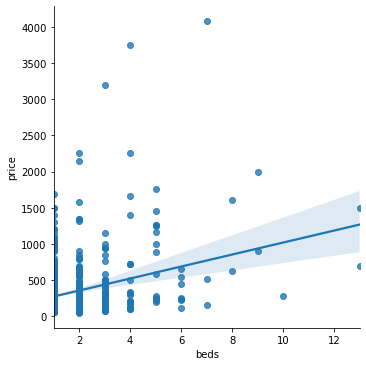

In [135]:
sns.lmplot(y="price", x='beds', data=df3 )

In [ ]:
sns.lmplot(x="price", y='beds', data=df3 )

<Figure size 1440x720 with 0 Axes>

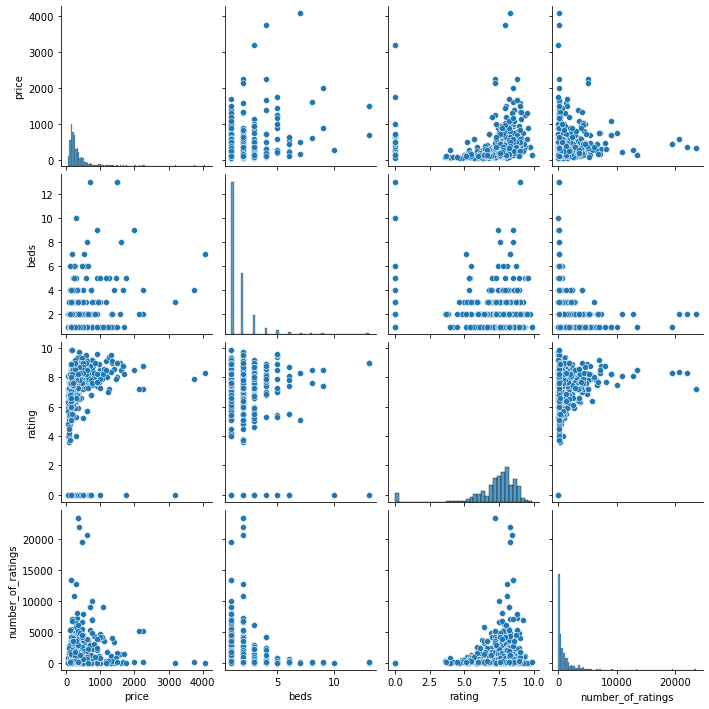

In [99]:
plt.figure(figsize=(20, 10))
sns.pairplot(x)
plt.show()



In [100]:
cor = x.corr()
cor

,price,beds,rating,number_of_ratings
price,1.000000,0.322004,0.138060,0.096067
beds,0.322004,1.000000,-0.123505,-0.096524
rating,0.138060,-0.123505,1.000000,0.143199
number_of_ratings,0.096067,-0.096524,0.143199,1.000000


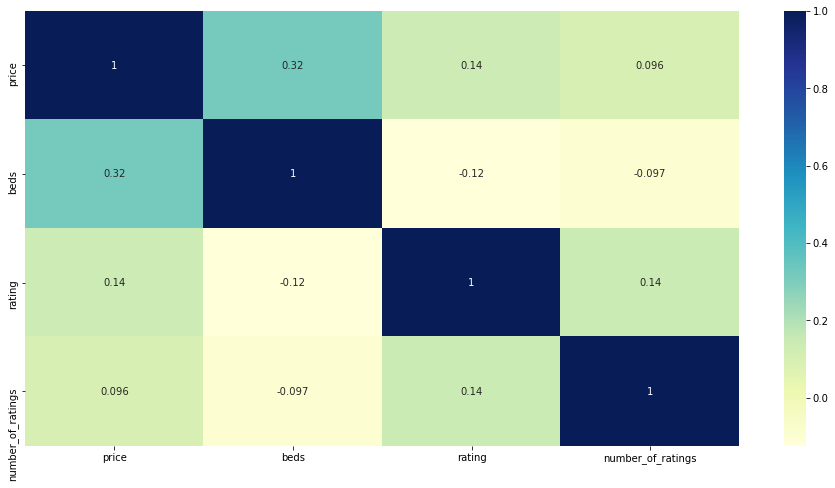

In [116]:


plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()



/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='beds'>

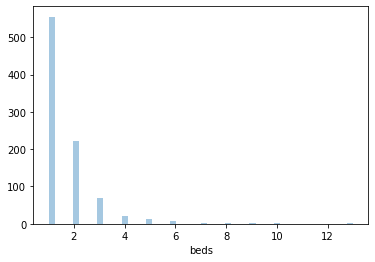

In [117]:
sns.distplot(df3['beds'],kde=False)

In [118]:
#df_log[‘price’] = np.log(df[‘price’])
#sns.distplot(df_set['price'], fit=norm)
#fig = plt.figure(

In [119]:
X = df[["beds",'rating','number_of_ratings']]


y = df["price"]



In [120]:
from sklearn.model_selection import train_test_split

In [121]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)

In [123]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [124]:
lm = LinearRegression(fit_intercept=True)

In [133]:
lm.fit(X_train, y_train)

ValueError: could not convert string to float: '1 double bed'

In [126]:
lm = LinearRegression(fit_intercept=True)